In [88]:
# Necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV ,  chi2, SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import joblib

In [75]:
df = pd.read_csv("../data/heart_disease.csv")
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,target
0,-1.142929,0.304724,1.149042,0.158837,0.876139,0.595961,-0.176824,-0.009395,0.174649,0.912271,...,0.136827,0.578796,0.197278,1.141342,0.716852,0.796239,0.480370,0.056991,-0.074387,0
1,-2.754957,0.839171,-0.146543,0.662535,-0.784552,0.343510,-0.803580,-0.391040,-0.013703,-0.236447,...,0.366100,0.542385,-0.262021,-0.357972,-0.625556,-0.503878,0.564779,0.320507,-0.069960,1
2,-2.227239,-1.063098,-0.476438,-0.004591,0.701716,0.722079,0.727509,-0.075420,-0.514487,0.172939,...,-0.162051,0.184718,0.400855,-0.635559,-0.013332,0.040540,-0.227690,0.045455,0.006188,1
3,1.140714,-0.565884,1.654154,-2.411838,1.395045,-0.672393,-0.620638,-0.000940,0.593531,-0.182818,...,0.372634,0.262408,-0.290314,0.261692,-0.158317,0.258858,-0.215395,0.632742,-0.050473,0
4,1.701610,-0.278171,1.043368,-0.592310,0.262726,0.785178,-0.685079,-0.625560,0.110237,-0.073178,...,-0.353327,-0.764656,0.400582,-0.085820,-0.167401,-0.047090,0.017240,-0.308711,-0.041251,0


In [76]:
X = df.drop(columns=['target'])
y = df['target']

In [77]:
# Fit Random Forest to estimate feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)


RandomForestClassifier(random_state=42)

In [78]:
importances = model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)


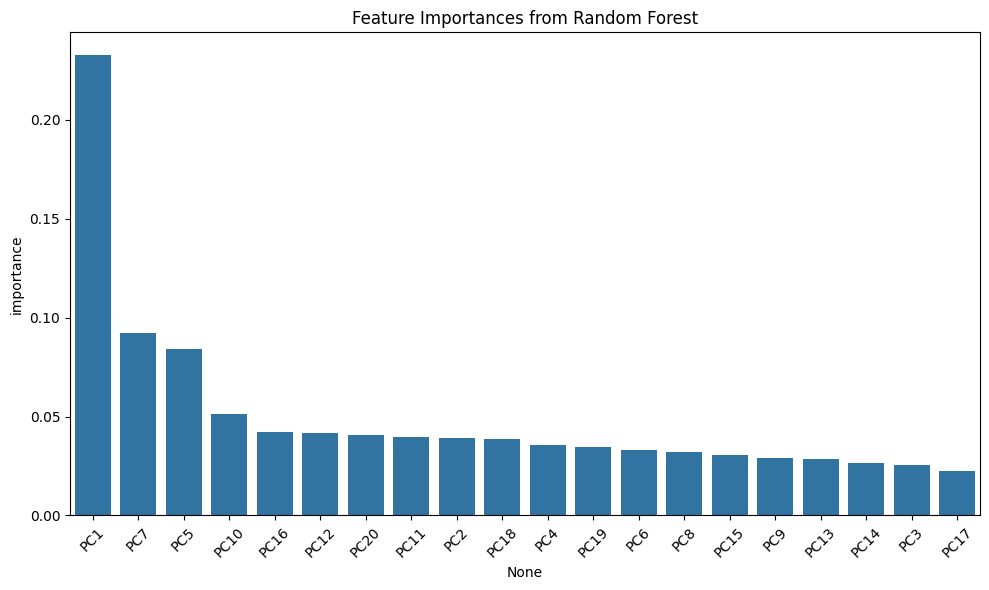

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=45)
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

In [80]:
# Create Decision Tree estimator
estimator = DecisionTreeClassifier(random_state=42)

# Apply RFECV to select best features with cross-validation
selector = RFECV(estimator, cv=5)
selector.fit(X, y)

# Optimal number of features
print("Optimal number of features:", selector.n_features_)

# Get selected features
selected_features = X.columns[selector.support_]
print("Selected features:", selected_features.tolist())

# Create a reduced dataset with only selected features
X_selected = X[selected_features]

Optimal number of features: 20
Selected features: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']


In [81]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Chi-Square test
chi2_selector = SelectKBest(chi2, k='all')  
chi2_selector.fit(X_scaled, y)

# Get Chi2 scores
scores = chi2_selector.scores_

chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': scores
}).sort_values(by='Chi2 Score', ascending=False)


<Figure size 1000x600 with 0 Axes>

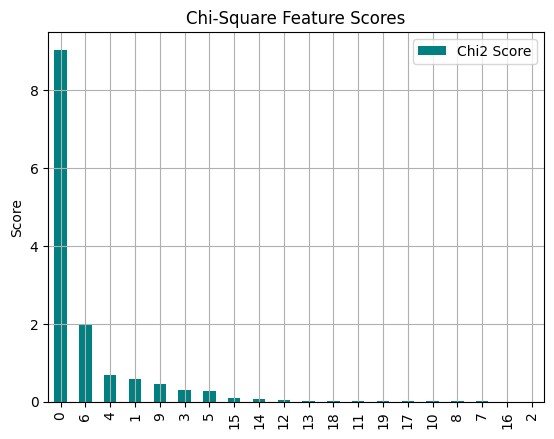

In [82]:
plt.figure(figsize=(10, 6))
chi2_results.plot(kind='bar', color='teal')
plt.title('Chi-Square Feature Scores')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [83]:
selected_features = chi2_results['Feature'].head(7).tolist()
X_selected = X[selected_features]

print(X_selected.head())

        PC1       PC7       PC5       PC2      PC10       PC4       PC6
0 -1.142929 -0.176824  0.876139  0.304724  0.912271  0.158837  0.595961
1 -2.754957 -0.803580 -0.784552  0.839171 -0.236447  0.662535  0.343510
2 -2.227239  0.727509  0.701716 -1.063098  0.172939 -0.004591  0.722079
3  1.140714 -0.620638  1.395045 -0.565884 -0.182818 -2.411838 -0.672393
4  1.701610 -0.685079  0.262726 -0.278171 -0.073178 -0.592310  0.785178


In [85]:
# Save the PCA transformed data
pca_df = pd.DataFrame(X_selected)
pca_df['target'] = y.values

pca_df.to_csv("../data/heart_disease.csv", index=False)
print("Data saved to ../data/heart_disease.csv Successfully.")

Data saved to ../data/heart_disease.csv Successfully.
